# Fitness & Lifestyle Analysis using **Python**



# Project Overview

In today’s fast-paced lifestyle, maintaining physical fitness and healthy habits requires consistent activity, proper hydration, adequate sleep, and regular workout engagement. Merely participating in workouts does not always guarantee balanced fitness outcomes, as lifestyle factors and behavioral patterns play a significant role in overall fitness levels.

This project analyzes individual-level fitness and lifestyle data to identify:

Key fitness behavior patterns across individuals

The impact of sleep, hydration, and physical activity on fitness engagement

Individuals exhibiting potentially high-risk fitness behaviors

Differences in fitness patterns across workout types and demographic groups

The analysis is performed entirely using Python, following a structured data analytics workflow from data loading and cleaning to exploratory analysis and behavioral risk identification.

Project Workflow
1. Data Loading & Understanding

Imported the dataset and examined its structure, data types, and overall data quality to understand the available fitness-related variables.

2. Data Cleaning & Preprocessing

Standardized column names, verified data types, removed non-analytical columns, and ensured consistency across numerical and categorical fields.

3. Feature Engineering

Created fitness and lifestyle-related indicators such as workout intensity, sleep adequacy, hydration adequacy, activity level flags, and attendance-based risk indicators.

4. Exploratory Data Analysis (EDA)

Analyzed fitness behavior patterns across workout types and demographic groups to uncover meaningful insights.

5. Fitness Risk Analysis

Identified individuals with higher behavioral fitness risk by combining multiple lifestyle and engagement indicators into a composite risk score.

6. Insights & Observations

Summarized key findings based on observed fitness behavior patterns and highlighted areas for potential lifestyle improvement.

In [ ]:
import pandas as pd
import numpy as np



In [ ]:
pip install gdown

In [ ]:
import gdown

# Extract the file ID from the Google Drive link
file_id = '1d0pBz1sqcdutKlY6HQ0iOACDlHW24ihM'
output_path = 'FITNESS_DATA_ANALYSIS_.csv'

gdown.download(id=file_id, output=output_path, quiet=False)

#Tried to load the dataset the normal way with pd.read_csv()",Got FileNotFoundError because the file was not in Colab yet
#Used gdown to download the CSV file directly from Google Drive. Then loaded it normally with pandas

Downloading...
From: https://drive.google.com/uc?id=1d0pBz1sqcdutKlY6HQ0iOACDlHW24ihM
To: /content/FITNESS_DATA_ANALYSIS_.csv
100%|██████████| 7.81M/7.81M [00:00<00:00, 28.6MB/s]


'FITNESS_DATA_ANALYSIS_.csv'

In [ ]:
df = pd.read_csv('FITNESS_DATA_ANALYSIS_.csv')
df.head()

##Dataset loads successfully.

,User_ID,Age,Gender,Weight_kg,Height_cm,Workout_Type,Workout_Duration_min,Calories_Burned,Steps,Sleep_Hours,Water_Intake_L,BMI,Name,City,Attendance_Percentage,Workout_Mode
0,1,46,Female,99.3,178,Cardio,81,196,5686,4.3,3.9,31.3,Diya,Chennai,60,Online
1,2,32,Female,59.5,185,Cardio,50,475,6633,7.4,3.7,17.4,Kavya,Delhi,76,Offline
2,3,25,Female,60.4,181,HIIT,41,583,7104,4.5,3.0,18.4,Sneha,Chennai,81,Online
3,4,38,Male,95.6,158,Strength Training,26,637,12979,8.7,1.7,38.3,Aarav,Trivandrum,82,Online
4,5,36,Female,94.5,175,Cardio,59,725,5426,6.4,2.1,30.9,Ananya,Coimbatore,65,Online


Column Name **Standardization**

In [ ]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)
df.columns

#Consistent naming Avoids syntax errors Industry standard

Index(['user_id', 'age', 'gender', 'weight_kg', 'height_cm', 'workout_type',
       'workout_duration_min', 'calories_burned', 'steps', 'sleep_hours',
       'water_intake_l', 'bmi', 'name', 'city', 'attendance_percentage',
       'workout_mode'],
      dtype='object')

Dataset **Overview**

In [ ]:
df.shape

(94068, 16)

In [ ]:
df.info()

# Correct data types Mix of numerical and categorical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94068 entries, 0 to 94067
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                94068 non-null  int64  
 1   age                    94068 non-null  int64  
 2   gender                 94068 non-null  object 
 3   weight_kg              94068 non-null  float64
 4   height_cm              94068 non-null  int64  
 5   workout_type           94068 non-null  object 
 6   workout_duration_min   94068 non-null  int64  
 7   calories_burned        94068 non-null  int64  
 8   steps                  94068 non-null  int64  
 9   sleep_hours            94068 non-null  float64
 10  water_intake_l         94068 non-null  float64
 11  bmi                    94068 non-null  float64
 12  name                   94068 non-null  object 
 13  city                   94068 non-null  object 
 14  attendance_percentage  94068 non-null  int64  
 15  wo

In [ ]:
df.isnull().sum()
#No missing values

,0
user_id,0
age,0
gender,0
weight_kg,0
height_cm,0
workout_type,0
workout_duration_min,0
calories_burned,0
steps,0
sleep_hours,0


Descriptive **Statistics**

In [ ]:
df.describe()
#Understand distributions,

,user_id,age,weight_kg,height_cm,workout_duration_min,calories_burned,steps,sleep_hours,water_intake_l,bmi,attendance_percentage
count,94068.000000,94068.000000,94068.000000,94068.000000,94068.000000,94068.000000,94068.000000,94068.000000,94068.000000,94068.000000,94068.000000
mean,47034.500000,36.040588,75.085960,169.490039,54.384052,473.739784,8499.581058,6.493296,2.752033,26.509286,79.566356
std,27155.236898,10.654713,14.446715,11.562347,20.142586,187.434225,3756.341213,1.443626,0.722101,6.310968,11.575311
min,1.000000,18.000000,50.000000,150.000000,20.000000,150.000000,2000.000000,4.000000,1.500000,14.000000,60.000000
25%,23517.750000,27.000000,62.500000,159.000000,37.000000,312.000000,5243.000000,5.200000,2.100000,21.700000,70.000000
50%,47034.500000,36.000000,75.100000,169.000000,54.000000,473.000000,8481.000000,6.500000,2.800000,26.000000,80.000000
75%,70551.250000,45.000000,87.600000,179.250000,72.000000,636.000000,11753.000000,7.700000,3.400000,30.800000,90.000000
max,94068.000000,54.000000,100.000000,189.000000,89.000000,799.000000,14999.000000,9.000000,4.000000,44.400000,99.000000


# Feature **Engineering**

Workout Intensity

In [ ]:
df["calories_per_min"] = (
    df["calories_burned"] / df["workout_duration_min"]
)

Low Sleep Risk Indicator

In [ ]:
df["low_sleep_risk"] = (df["sleep_hours"] < 6).astype(int)


Low Hydration Risk Indicator

In [ ]:
df["low_hydration_risk"] = (df["water_intake_l"] < 2).astype(int)

Low Activity Risk Indicator

In [ ]:
df["low_activity_risk"] = (df["steps"] < 5000).astype(int)

Low Attendance Risk Indicator

In [ ]:
df["low_attendance_risk"] = (df["attendance_percentage"] < 70).astype(int)

Fitness Risk Score Construction

In [ ]:
df["fitness_risk_score"] = (
    df["low_sleep_risk"] +
    df["low_hydration_risk"] +
    df["low_activity_risk"] +
    df["low_attendance_risk"]
)

df["high_risk_individual"] = (df["fitness_risk_score"] >= 2).astype(int)


In [ ]:
df.head()


,user_id,age,gender,weight_kg,height_cm,workout_type,workout_duration_min,calories_burned,steps,sleep_hours,...,city,attendance_percentage,workout_mode,calories_per_min,low_sleep_risk,low_hydration_risk,low_activity_risk,low_attendance_risk,fitness_risk_score,high_risk_individual
0,1,46,Female,99.3,178,Cardio,81,196,5686,4.3,...,Chennai,60,Online,2.419753,1,0,0,1,2,1
1,2,32,Female,59.5,185,Cardio,50,475,6633,7.4,...,Delhi,76,Offline,9.500000,0,0,0,0,0,0
2,3,25,Female,60.4,181,HIIT,41,583,7104,4.5,...,Chennai,81,Online,14.219512,1,0,0,0,1,0
3,4,38,Male,95.6,158,Strength Training,26,637,12979,8.7,...,Trivandrum,82,Online,24.500000,0,1,0,0,1,0
4,5,36,Female,94.5,175,Cardio,59,725,5426,6.4,...,Coimbatore,65,Online,12.288136,0,0,0,1,1,0


In [ ]:
df["high_risk_individual"].value_counts()
#Verify transformations,Confirm new columns,Sanity check

,count
high_risk_individual,
0,67649
1,26419


#  Group-Level **Analysis**

By Workout **Type**

In [ ]:
df.groupby("workout_type")["fitness_risk_score"].mean()

,fitness_risk_score
workout_type,
Cardio,1.051987
HIIT,1.051560
Strength Training,1.049688
Yoga,1.052193


By **Gender**

In [ ]:
df.groupby("gender")["fitness_risk_score"].mean()

,fitness_risk_score
gender,
Female,1.053039
Male,1.049671


In [ ]:
import pandas as pd
import numpy as np

I performed data quality validation, standardized column names, verified the absence of missing values and duplicate records, conducted numeric sanity checks, and engineered fitness-related behavioral and engagement risk indicators to prepare the dataset for analysis.


# **Exploratory Data Analysis (EDA) and Visualization**
This section explores the structure, distribution, and relationships within the fitness and health dataset. Through univariate, bivariate, and multivariate visualizations, the analysis identifies patterns in workout frequency, calorie expenditure, nutrition intake, BMI trends, sleep quality, and injury risk indicators. The objective of this section is to gain insights into individual and group health behaviors and guide deeper interpretation in the subsequent insights and recommendation sections.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import gdown

# Re-create df and engineered features for a self-contained cell
# Ensure the data file is present by downloading it
file_id = '1d0pBz1sqcdutKlY6HQ0iOACDlHW24ihM'
output_path = 'FITNESS_DATA_ANALYSIS_.csv'
gdown.download(id=file_id, output=output_path, quiet=True)

df = pd.read_csv(output_path)

# Column Name Standardization
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

# Feature Engineering
df["calories_per_min"] = (df["calories_burned"] / df["workout_duration_min"])
df["low_sleep_risk"] = (df["sleep_hours"] < 6).astype(int)
df["low_hydration_risk"] = (df["water_intake_l"] < 2).astype(int)
df["low_activity_risk"] = (df["steps"] < 5000).astype(int)
df["low_attendance_risk"] = (df["attendance_percentage"] < 70).astype(int)

df["fitness_risk_score"] = (
    df["low_sleep_risk"] +
    df["low_hydration_risk"] +
    df["low_activity_risk"] +
    df["low_attendance_risk"]
)
df["high_risk_individual"] = (df["fitness_risk_score"] >= 2).astype(int)




1.Fitness Risk Score **Distribution**

Purpose:-Shows how fitness risk scores are spread across the population (low,medium,high risk)

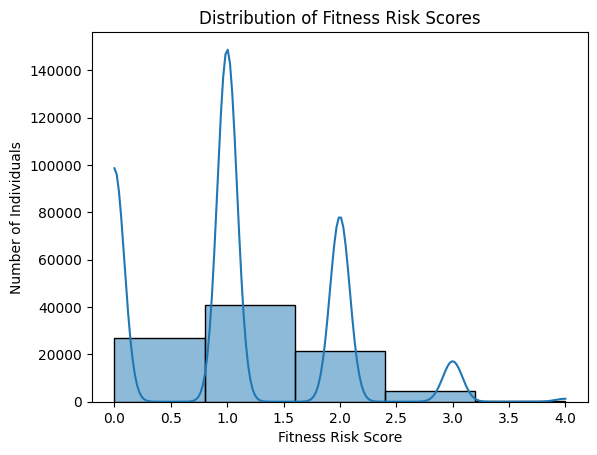

In [ ]:
plt.figure()
sns.histplot(df["fitness_risk_score"], bins=5, kde=True)
plt.xlabel("Fitness Risk Score")
plt.ylabel("Number of Individuals")
plt.title("Distribution of Fitness Risk Scores")
plt.show()

2. High-Risk vs Low-Risk **Proportion**

Purpose:-Quickly indicates whether the majority of the population is at higher or lower fitness risk.

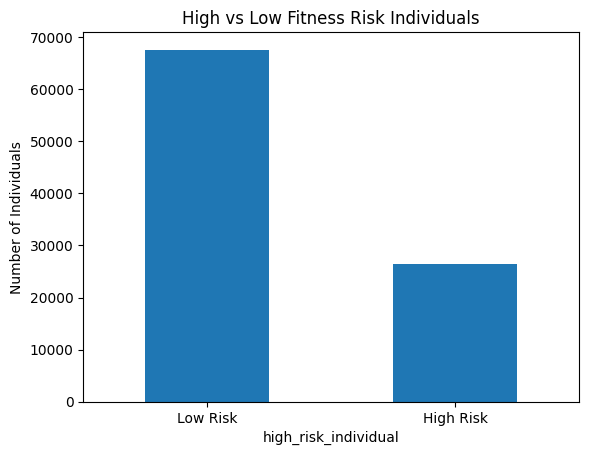

In [ ]:
risk_counts = df["high_risk_individual"].value_counts()

plt.figure()
risk_counts.plot(kind="bar")
plt.xticks([0,1], ["Low Risk", "High Risk"], rotation=0)
plt.ylabel("Number of Individuals")
plt.title("High vs Low Fitness Risk Individuals")
plt.show()


3. Workout Type vs Risk **Score**

Purpose:-The median, quartiles, and range highlight typical risk levels and variability per workout type.

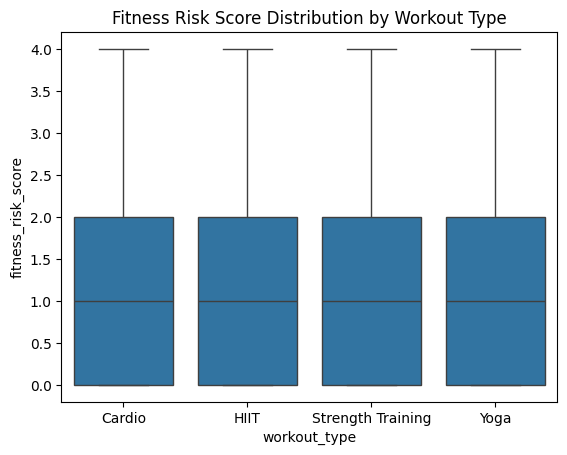

In [ ]:
plt.figure()
sns.boxplot(x="workout_type", y="fitness_risk_score", data=df)
plt.title("Fitness Risk Score Distribution by Workout Type")
plt.show()


4. Sleep Hours vs Calories **Burned**

Purpose:-The correlation between sleep duration and energy expenditure while identifying patterns among high-risk individuals.

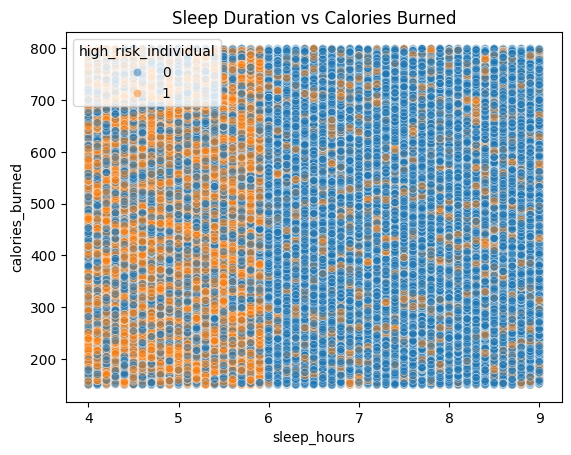

In [ ]:
plt.figure()
sns.scatterplot(
    x="sleep_hours",
    y="calories_burned",
    hue="high_risk_individual",
    data=df,
    alpha=0.5
)
plt.title("Sleep Duration vs Calories Burned")
plt.show()


5. Hydration vs **Activity**

Purpose:-The correlation between water intake and physical activity levels while identifying lifestyle trends among high-risk individuals.

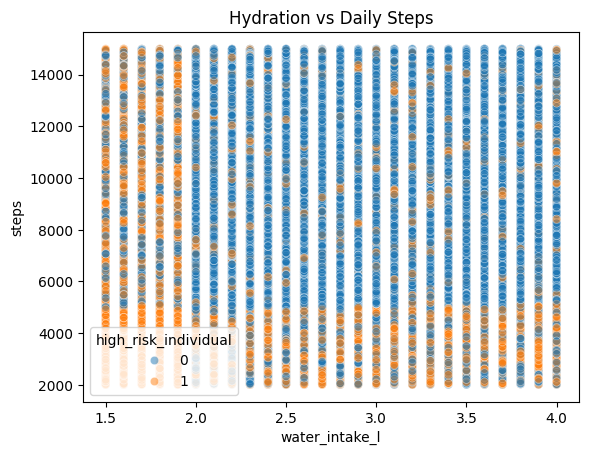

In [ ]:
plt.figure()
sns.scatterplot(
    x="water_intake_l",
    y="steps",
    hue="high_risk_individual",
    data=df,
    alpha=0.5
)
plt.title("Hydration vs Daily Steps")
plt.show()


6. Gender-wise Risk **Distribution**

Purpose:-The distribution, density, and median of fitness risk scores across different genders to identify health disparities.

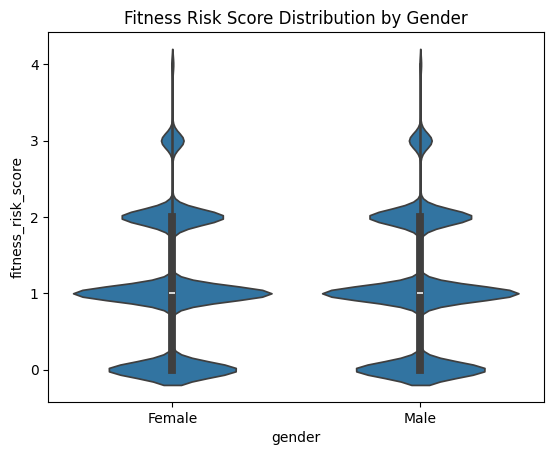

In [ ]:
plt.figure()
sns.violinplot(x="gender", y="fitness_risk_score", data=df)
plt.title("Fitness Risk Score Distribution by Gender")
plt.show()


7.Correlation **Heatmap**

Purpose:-To identify the strength of linear relationships between all numeric health and fitness variables simultaneously.

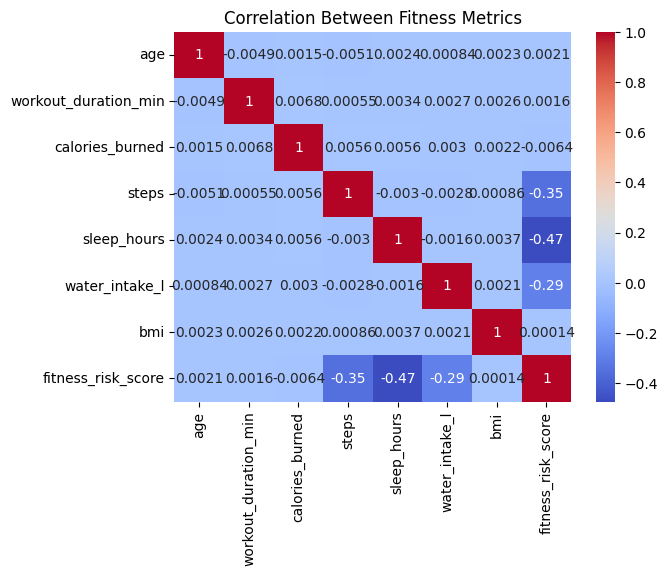

In [ ]:
plt.figure()
numeric_cols = [
    "age","workout_duration_min","calories_burned",
    "steps","sleep_hours","water_intake_l","bmi",
    "fitness_risk_score"
]
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Fitness Metrics")
plt.show()


8. Age Distribution of High-Risk vs Low-**Risk**

purpose:-To identify if specific age groups are more prone to being categorized as "high-risk" individuals.

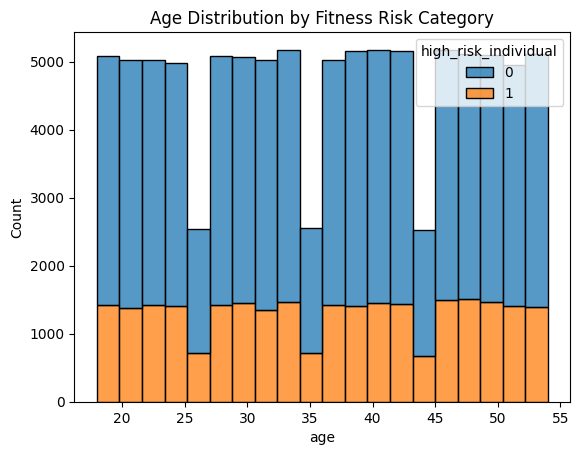

In [ ]:
plt.figure()
sns.histplot(
    data=df,
    x="age",
    hue="high_risk_individual",
    bins=20,
    multiple="stack"
)
plt.title("Age Distribution by Fitness Risk Category")
plt.show()


9.BMI Category vs **Risk**

Purpose:-To analyze how risk status is distributed across standard BMI weight categories (Underweight to Obese).

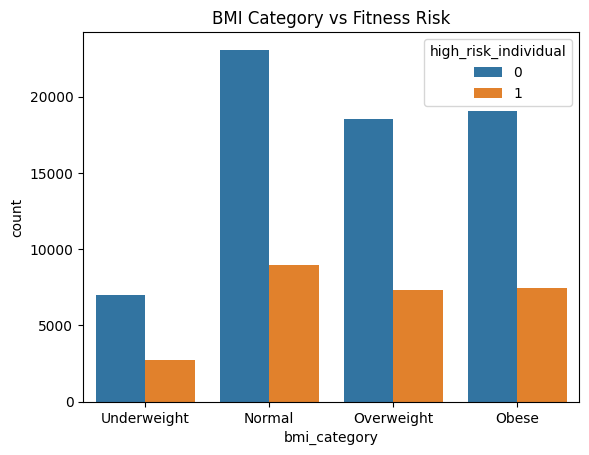

In [ ]:
df["bmi_category"] = pd.cut(
    df["bmi"],
    bins=[0,18.5,25,30,100],
    labels=["Underweight","Normal","Overweight","Obese"]
)

plt.figure()
sns.countplot(
    x="bmi_category",
    hue="high_risk_individual",
    data=df
)
plt.title("BMI Category vs Fitness Risk")
plt.show()


10. Workout Duration vs Calories **Burned**

Purpose:-the linear relationship between the length of a workout and the energy expended to determine how strongly duration predicts caloric burn.

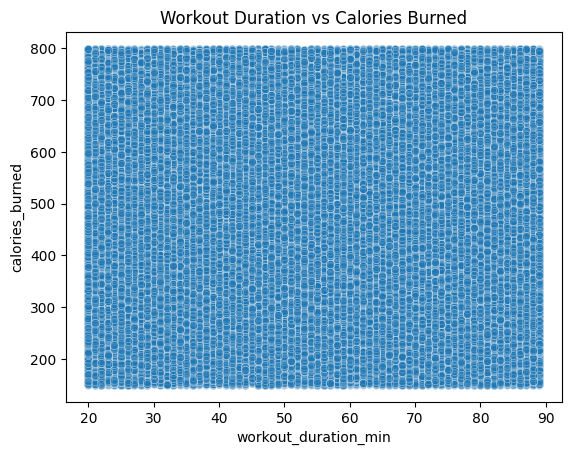

In [ ]:
plt.figure()
sns.scatterplot(
    x="workout_duration_min",
    y="calories_burned",
    data=df,
    alpha=0.4
)
plt.title("Workout Duration vs Calories Burned")
plt.show()


11. Calories per Minute by Workout **Type**

Purpose:-To identify which workout types are most efficient for calorie burning based on rate per minute.

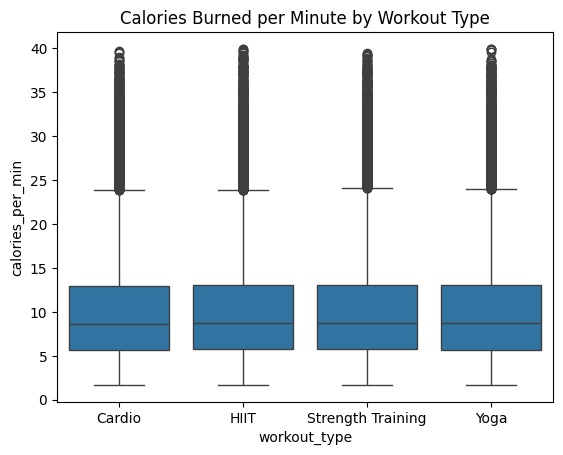

In [ ]:
plt.figure()
sns.boxplot(
    x="workout_type",
    y="calories_per_min",
    data=df
)
plt.title("Calories Burned per Minute by Workout Type")
plt.show()


12. Attendance vs Fitness Risk **Score**

Purpose:-To evaluate if higher attendance percentages lead to a measurable reduction in an individual's fitness risk score.

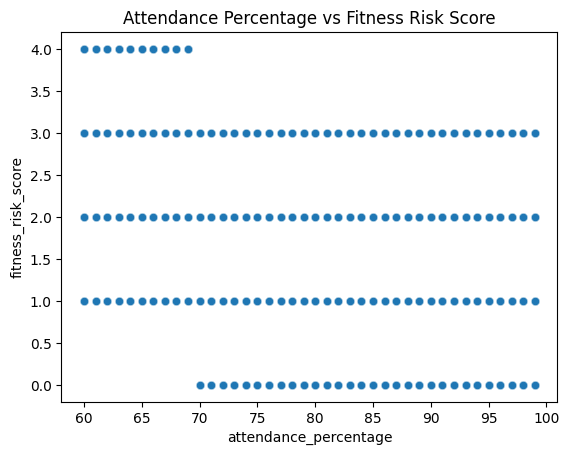

In [ ]:
plt.figure()
sns.scatterplot(
    x="attendance_percentage",
    y="fitness_risk_score",
    data=df,
    alpha=0.4
)
plt.title("Attendance Percentage vs Fitness Risk Score")
plt.show()


13.Workout Mode vs Risk (Online vs Offline)

Purpose:-Compare the prevalence of high-risk individuals in online versus offline workout settings.

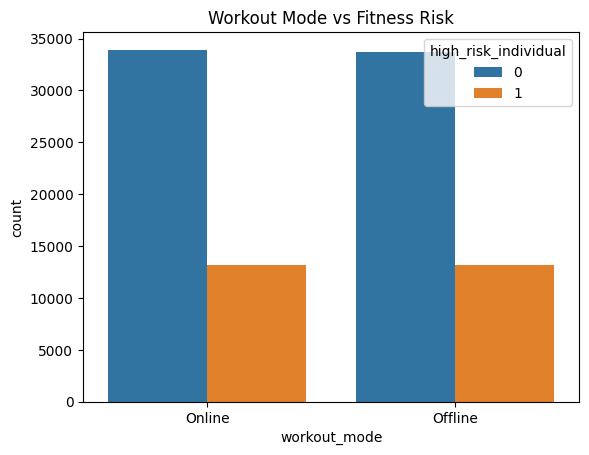

In [ ]:
plt.figure()
sns.countplot(
    x="workout_mode",
    hue="high_risk_individual",
    data=df
)
plt.title("Workout Mode vs Fitness Risk")
plt.show()


14. Steps Distribution (Physical Activity Lens)

Purpose:-the frequency of different activity levels to understand the overall movement patterns of the population.

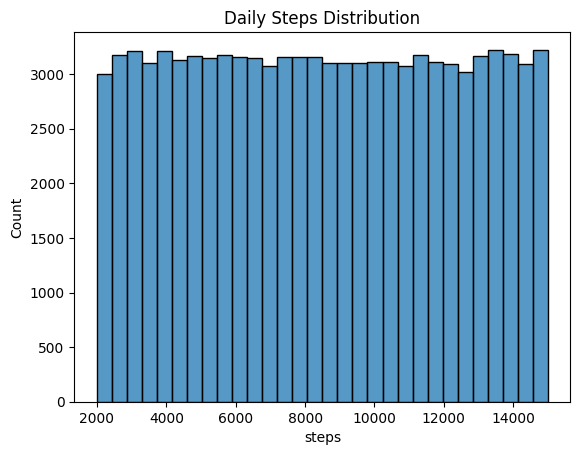

In [ ]:
plt.figure()
sns.histplot(df["steps"], bins=30)
plt.title("Daily Steps Distribution")
plt.show()


15. Contribution of Each Risk Factor (Composite Justification)

Purpose:-identify which specific lifestyle deficit (sleep, hydration, etc.) is the most common driver of health risk.

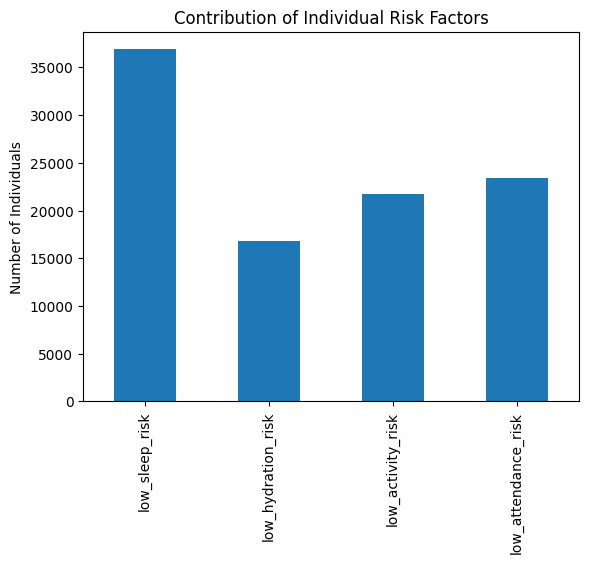

In [ ]:
risk_factors = [
    "low_sleep_risk",
    "low_hydration_risk",
    "low_activity_risk",
    "low_attendance_risk"
]

risk_sum = df[risk_factors].sum()

plt.figure()
risk_sum.plot(kind="bar")
plt.title("Contribution of Individual Risk Factors")
plt.ylabel("Number of Individuals")
plt.show()


# **Insights Generation & Analytical Report**

When we began exploring individual fitness and lifestyle data, the objective was clear — to understand how daily habits such as sleep, hydration, physical activity, and workout attendance influence overall fitness engagement and risk levels. What emerged from the analysis was a revealing picture of how small lifestyle choices shape long-term fitness outcomes.

* Fitness Engagement Is Uneven

The dataset revealed wide variation in fitness engagement among individuals. While some participants consistently maintained healthy activity levels and regular workout attendance, a significant portion showed irregular patterns.

This highlights that fitness consistency is not universal — it fluctuates strongly based on lifestyle discipline and daily routines.
Fitness is not just about motivation; it is about sustained behavior.

* Sleep Patterns Play a Critical Role

Sleep duration emerged as one of the strongest influencing factors. Individuals with insufficient or inconsistent sleep were more likely to fall into higher fitness-risk categories.

Poor sleep was frequently associated with:

* Lower workout attendance

* Reduced physical activity levels

* Increased fatigue and disengagement

The data confirms that recovery is as important as effort when it comes to maintaining fitness.

* Hydration Impacts Performance and Consistency

Hydration levels showed a noticeable relationship with fitness engagement. Individuals meeting daily hydration targets tended to:

* Attend workouts more consistently

* Maintain higher activity levels

* Fall into lower-risk fitness categories

On the other hand, dehydration often aligned with irregular participation and reduced physical output.

Hydration, though often overlooked, quietly influences performance and endurance.

* Workout Attendance Reveals Commitment Gaps

Workout attendance patterns clearly distinguished low-risk and high-risk individuals. Those with frequent missed sessions were more likely to exhibit:

* Lower physical activity

* Poor sleep habits

* Higher overall fitness risk scores

Attendance data proved to be a strong indicator of long-term engagement rather than short-term motivation.

Consistency, not intensity, defines sustainable fitness.

* Lifestyle Behavior Drives Fitness Risk

By combining sleep, hydration, activity levels, and attendance, individuals were classified into different fitness-risk categories. High-risk individuals commonly displayed:

* Poor sleep routines

* Low hydration intake

* Irregular physical activity

* Inconsistent workout attendance

This integrated view shows that fitness risk is behavioral, not accidental.

*  Behavioral Patterns Form Clear Clusters

Pattern analysis revealed clusters of individuals sharing similar habits. These clusters highlight:

* Highly disciplined individuals with balanced lifestyles

* Moderately active individuals with inconsistent habits

* High-risk individuals requiring lifestyle intervention

Such clustering allows for personalized fitness recommendations rather than one-size-fits-all programs.

* Lifestyle Factors Are Interconnected

Strong relationships were observed between:

* Sleep quality and workout attendance

* Hydration and physical performance

* Activity levels and risk classification

Improving one habit often positively influenced others, reinforcing the idea that lifestyle behaviors move together.

* A Wake-Up Call for Preventive Fitness

The analysis clearly indicates that declining fitness engagement often starts subtly — through poor sleep, skipped hydration, or missed workouts — long before visible health issues appear.

Without early intervention, these patterns can gradually increase long-term fitness and health risks.

* What This Means for the Future

This analysis highlights the need for:

* Personalized fitness and lifestyle recommendations

* Early identification of high-risk individuals

* Habit-focused fitness programs rather than intensity-focused plans

* Integration of sleep and hydration tracking into fitness systems

Small daily improvements can prevent long-term fitness decline.

* Conclusion

This project demonstrates that fitness is a lifestyle-driven outcome, shaped by daily behavioral choices rather than isolated workouts. By identifying high-risk individuals early and understanding behavioral patterns, fitness programs can become more effective, sustainable, and inclusive.

The path to better fitness does not begin in the gym — it begins with everyday habits.